In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from scipy.spatial.distance import cdist

# STATIONARITY

In [ ]:
#Load the dataset
df = pd.read_csv("PT_Train.csv")
df.head(15)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0
5,17/08/2015 15:14,132,41,92.0,134.0
6,17/08/2015 15:15,132,47,92.0,135.0
7,17/08/2015 15:16,133,44,92.0,135.0
8,17/08/2015 15:17,136,45,94.0,136.0
9,17/08/2015 15:18,137,42,93.0,138.0


In [ ]:
#Rename coloumn to better manage
df = df.rename(columns={"Timestamp (GMT)": "Timestamp"})
df = df.rename(columns={"Lifetouch Heart Rate": "Heart Rate"})

#Printing the head of 15 coloumns to review if coloumns have been adjusted
df.head(15)

,Timestamp,Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0
5,17/08/2015 15:14,132,41,92.0,134.0
6,17/08/2015 15:15,132,47,92.0,135.0
7,17/08/2015 15:16,133,44,92.0,135.0
8,17/08/2015 15:17,136,45,94.0,136.0
9,17/08/2015 15:18,137,42,93.0,138.0


In [ ]:
print(df.shape)

(226, 5)


In [ ]:
df.isnull()

,Timestamp,Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,False,False,False,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
221,False,False,False,True,True
222,False,False,False,True,True
223,False,False,False,True,True
224,False,False,False,True,True


In [ ]:
#Finding missing values in each coloumn
df.isna().sum()

Timestamp                      0
Heart Rate                     0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

In [ ]:
#We see Timestamp is a string coloumn
print(type('Timestamp'))

<class 'str'>


In [ ]:
# converting Timestamp to int
df['Minutes'] = list(range(0, len(df['Timestamp'])))

df.head()

,Timestamp,Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse,Minutes
0,17/08/2015 15:09,139,41,NaN,NaN,0
1,17/08/2015 15:10,144,40,92.0,140.0,1
2,17/08/2015 15:11,140,42,89.0,144.0,2
3,17/08/2015 15:12,138,45,93.0,141.0,3
4,17/08/2015 15:13,133,42,94.0,134.0,4


In [ ]:
print(type('Timestamp'))

<class 'str'>


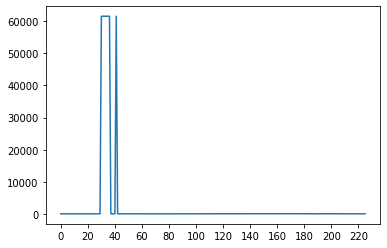

In [ ]:
# plot time series
plt.plot(df['Minutes'],df['Heart Rate'])
plt.xticks(np.arange(min(df['Minutes']), max(df['Minutes'])+1, 20)) # define x-axis step size
plt.show()

**It is impossible to have a human heart 60,000 heart rate, therefore we need to range lower.**

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index(('Timestamp'), inplace=True)

In [ ]:
#Creating a new variable that encapsulates the drop of *other coloumns in the dataset
df2= df.drop(columns=['Lifetouch Respiration Rate','Oximeter SpO2', 'Oximeter Pulse'])



In [ ]:
#checking the new shape of new copy variable and we see that *others not needed are dropped
df2.shape

(226, 2)

In [ ]:
df2.head()

,Heart Rate,Minutes
Timestamp,,
2015-08-17 15:09:00,139,0
2015-08-17 15:10:00,144,1
2015-08-17 15:11:00,140,2
2015-08-17 15:12:00,138,3
2015-08-17 15:13:00,133,4


In [ ]:
new_data= df2.copy()

In [ ]:
#It is impossible for a human heart rate to be at 60,000Bpm
df2.groupby(['Heart Rate']).max()

,Minutes
Heart Rate,
106,40
120,23
129,29
131,119
132,110
133,111
134,117
135,121
136,124


In [ ]:
#So we range down to 300BPM
df.drop(df[df['Heart Rate']>300].index, inplace=True)
mean = df['Heart Rate'].mean()
new_data['Heart Rate'] = np.where(new_data['Heart Rate'] > 300, mean, new_data['Heart Rate'])

In [ ]:
new_data

,Heart Rate,Minutes
Timestamp,,
2015-08-17 15:09:00,139.0,0
2015-08-17 15:10:00,144.0,1
2015-08-17 15:11:00,140.0,2
2015-08-17 15:12:00,138.0,3
2015-08-17 15:13:00,133.0,4
...,...,...
2015-08-17 18:50:00,159.0,221
2015-08-17 18:51:00,151.0,222
2015-08-17 18:52:00,140.0,223


In [ ]:
new_data.shape

(226, 2)

In [ ]:
#Calling the statistical values of the dataset
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2015-08-17 15:09:00 to 2015-08-17 18:54:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Heart Rate  226 non-null    float64
 1   Minutes     226 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 13.4 KB


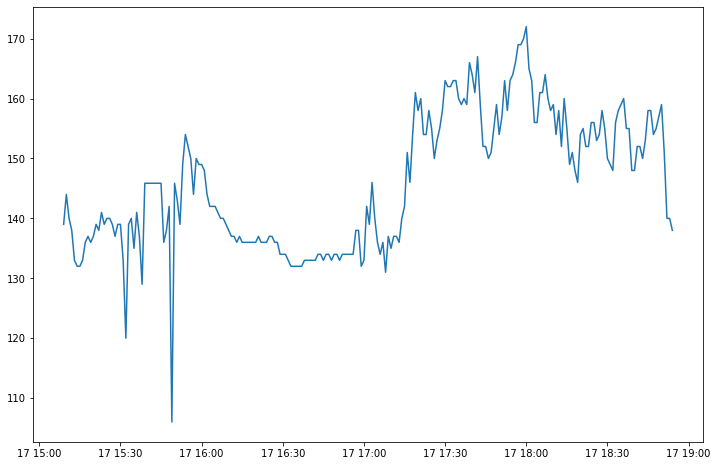

In [ ]:
# plot time series
plt.figure(figsize=(12, 8))
plt.plot(new_data.index,new_data['Heart Rate'])
plt.show()

# KPSS TEST FOR STATIONARITY

In [ ]:
# Testing for time series stationarity with KPSS TEST
def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value}')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')

In [ ]:
check_stationarity(new_data['Heart Rate'])

p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# LOG TRANSMISSION

**Reason Used: To get rid of the multiplicative variance**

In [ ]:
# to the coloumn of Heart rate we are applying log therefore transforming Heart rate to Log heart rate
new_data['Log-Heart Rate'] = np.log(new_data['Heart Rate']) 

print(new_data.shape)
new_data.head()

(226, 3)


,Heart Rate,Minutes,Log-Heart Rate
Timestamp,,,
2015-08-17 15:09:00,139.0,0,4.934474
2015-08-17 15:10:00,144.0,1,4.969813
2015-08-17 15:11:00,140.0,2,4.941642
2015-08-17 15:12:00,138.0,3,4.927254
2015-08-17 15:13:00,133.0,4,4.890349


In [ ]:
# plot time series
plt.plot(df['Minutes'],df['Log-Heart Rate'])
plt.xticks(np.arange(min(df['Minutes']), max(df['Minutes'])+1, 20)) # define x-axis step size
plt.show()

KeyError: ignored

In [ ]:
check_stationarity(new_data['Log-Heart Rate'][13:])

p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# DESEASONALIZATION
**From one time point we are removing the 12th time point before**

In [ ]:
new_data['Deseasonalised-Heart Rate'] = new_data[['Log-Heart Rate']].diff(axis=0, periods=12)
new_data.head(15)

,Heart Rate,Minutes,Log-Heart Rate,Deseasonalised-Heart Rate
Timestamp,,,,
2015-08-17 15:09:00,139.0,0,4.934474,NaN
2015-08-17 15:10:00,144.0,1,4.969813,NaN
2015-08-17 15:11:00,140.0,2,4.941642,NaN
2015-08-17 15:12:00,138.0,3,4.927254,NaN
2015-08-17 15:13:00,133.0,4,4.890349,NaN
2015-08-17 15:14:00,132.0,5,4.882802,NaN
2015-08-17 15:15:00,132.0,6,4.882802,NaN
2015-08-17 15:16:00,133.0,7,4.890349,NaN
2015-08-17 15:17:00,136.0,8,4.912655,NaN


In [ ]:
new_data['Differenced-Heart Rate'] = new_data[['Deseasonalised-Heart Rate']].diff(axis=0, periods=1)
new_data.head(15)

,Heart Rate,Minutes,Log-Heart Rate,Deseasonalised-Heart Rate,Differenced-Heart Rate
Timestamp,,,,,
2015-08-17 15:09:00,139.0,0,4.934474,NaN,NaN
2015-08-17 15:10:00,144.0,1,4.969813,NaN,NaN
2015-08-17 15:11:00,140.0,2,4.941642,NaN,NaN
2015-08-17 15:12:00,138.0,3,4.927254,NaN,NaN
2015-08-17 15:13:00,133.0,4,4.890349,NaN,NaN
2015-08-17 15:14:00,132.0,5,4.882802,NaN,NaN
2015-08-17 15:15:00,132.0,6,4.882802,NaN,NaN
2015-08-17 15:16:00,133.0,7,4.890349,NaN,NaN
2015-08-17 15:17:00,136.0,8,4.912655,NaN,NaN


In [ ]:
# plot time series
plt.plot(df['Minutes'],df['Deseasonalised-Heart Rate'])
plt.xticks(np.arange(min(df['Minutes']), max(df['Minutes'])+1, 20)) # define x-axis step size
plt.show()

KeyError: ignored

In [ ]:
#checkng stationarity from the first 13 rows because from the 1st to the 12th are null values
check_stationarity(new_data['Differenced-Heart Rate'][13:])

p value: 0.1
Result: The series is stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**After Deasonalisation we discovered our data is stationary, so therefore no need of differencing**

# EMBEDDING
# This should be applied after stationarity

In [ ]:

# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('PT_Train.csv')

#Rename coloumn to better manage
df = df.rename(columns={"Timestamp (GMT)": "Timestamp"})
df = df.rename(columns={"Lifetouch Heart Rate": "Heart Rate"})

#Printing the head of 15 coloumns to review if coloumns have been adjusted
df.head(15)
# convert month to int
df['Minutes'] = list(range(0, len(df['Timestamp'])))

df.head()

,Timestamp,Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse,Minutes
0,17/08/2015 15:09,139,41,NaN,NaN,0
1,17/08/2015 15:10,144,40,92.0,140.0,1
2,17/08/2015 15:11,140,42,89.0,144.0,2
3,17/08/2015 15:12,138,45,93.0,141.0,3
4,17/08/2015 15:13,133,42,94.0,134.0,4


In [ ]:
# get values in column 'Sales' as a numpy array
x = df['Heart Rate'].to_numpy()

print(f"Shape of data: {x.shape}")
print(x[:10])

Shape of data: (226,)
[139 144 140 138 133 132 132 133 136 137]


In [ ]:
# get delay embedding series
print("\nStacked data with delay embedding 2:")
X_2 = np.vstack((x[:-1], x[1:])).T
print(X_2[:5,:])

print("\nStacked data with delay embedding 3:")
X_3 = np.vstack((x[:-2], x[1:-1], x[2:])).T
print(X_3[:5,:])
     


Stacked data with delay embedding 2:
[[139 144]
 [144 140]
 [140 138]
 [138 133]
 [133 132]]

Stacked data with delay embedding 3:
[[139 144 140]
 [144 140 138]
 [140 138 133]
 [138 133 132]
 [133 132 132]]


In [ ]:
u,s,v = np.linalg.svd(X_3)
print("Relative importance of each dimension for an order 3 delay embedding:")
print(s/max(s))

print("Relative importance of each dimension for an order 4 delay embedding:")
X_4 = np.vstack((x[:-3],x[1:-2],x[2:-1],x[3:])).T
u,s,v = np.linalg.svd(X_4)
print(s/max(s))

print("Relative importance of each dimension for an order 5 delay embedding:")
X_5 = np.vstack((x[:-4],x[1:-3],x[2:-2],x[3:-1],x[4:])).T
u,s,v = np.linalg.svd(X_5)
print(s/max(s))

print("Relative importance of each dimension for an order 6 delay embedding:")
X_6 = np.vstack((x[:-5],x[1:-4],x[2:-3],x[3:-2],x[4:-1],x[5:])).T
u,s,v = np.linalg.svd(X_6)
print(s/max(s))

Relative importance of each dimension for an order 3 delay embedding:
[1.         0.39267763 0.29165139]
Relative importance of each dimension for an order 4 delay embedding:
[1.         0.42713466 0.28430264 0.25609373]
Relative importance of each dimension for an order 5 delay embedding:
[1.         0.46946486 0.28766551 0.24975044 0.23414794]
Relative importance of each dimension for an order 6 delay embedding:
[1.         0.49592289 0.32579618 0.23606564 0.23125948 0.20967281]


# FORECASTING

**SARIMAX** **MODEL**

In [ ]:
p = d = q = range(0, 3)

# generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq = [(1, 1, 1, 12)]

for param in pdq:
    for param_seasonal in seasonal_pdq:
          mod = sm.tsa.statespace.SARIMAX(new_data['Heart Rate'],
                                          order=param,
                                          seasonal_order=param_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

          mod_fit = mod.fit()

          print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, mod_fit.aic))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1451.4779180915


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1368.2168976244393


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:1341.47171260518
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1284.1988250048528


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1247.628599510876


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1243.3364718132402


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:1462.3394556639394


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:1266.6721114105264


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:1233.0793703296667


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1268.2507406212412


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1252.6945232811536


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:1247.9139053588258


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1248.2312976490234


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1249.6284559704968


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1243.9241463792246


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:1373.928532381668


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:1244.046169405662


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, 

ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:1235.0772157314414
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:1244.7243887105406


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:1254.6105077504255


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, 

ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:1238.8174155003824
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:1235.7126648734336


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:1235.3306981858495


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:1230.4432441305812


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:1293.643368041837


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:1237.724782228022


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:1232.0018791921611


In [ ]:
# specifing the model
model = sm.tsa.statespace.SARIMAX(new_data['Heart Rate'],
                                order=(2, 1, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# train model & retriving a summary of the model
model_fit = model.fit(disp=0)
print(model_fit.summary())



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                           Heart Rate   No. Observations:                  226
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -608.222
Date:                              Sat, 18 Feb 2023   AIC                           1230.443
Time:                                      06:33:53   BIC                           1253.461
Sample:                                  08-17-2015   HQIC                          1239.760
                                       - 08-17-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7764      0.234     -3.315      0.001      -1.236      -0.317
ar.L2         -0.45

In [ ]:
# making predictions & ranging the start and end period 
preds = model_fit.predict(start=pd.to_datetime('2015-08-17 16:08:00'), end=pd.to_datetime('2015-08-17 17:27:00'), dynamic=False)
print(preds)

2015-08-17 16:08:00    135.882235
2015-08-17 16:09:00    141.890444
2015-08-17 16:10:00    139.467761
2015-08-17 16:11:00    138.609125
2015-08-17 16:12:00    137.954581
                          ...    
2015-08-17 17:23:00    154.971147
2015-08-17 17:24:00    155.061534
2015-08-17 17:25:00    153.088929
2015-08-17 17:26:00    157.336684
2015-08-17 17:27:00    154.940034
Freq: T, Name: predicted_mean, Length: 80, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
# calculate MSE
actuals = df['Heart Rate']
actuals = actuals.loc['2015-08-17 16:08:00': '2015-08-17 17:27:00' ]
print(f'Mean Squared Error: {round(np.sqrt(mean_squared_error(actuals, preds)), 2)}')

ValueError: ignored

In [ ]:
new_data.head()

,Heart Rate,Minutes,Log-Heart Rate,Deseasonalised-Heart Rate,Differenced-Heart Rate
Timestamp,,,,,
2015-08-17 15:09:00,139.0,0,4.934474,NaN,NaN
2015-08-17 15:10:00,144.0,1,4.969813,NaN,NaN
2015-08-17 15:11:00,140.0,2,4.941642,NaN,NaN
2015-08-17 15:12:00,138.0,3,4.927254,NaN,NaN
2015-08-17 15:13:00,133.0,4,4.890349,NaN,NaN


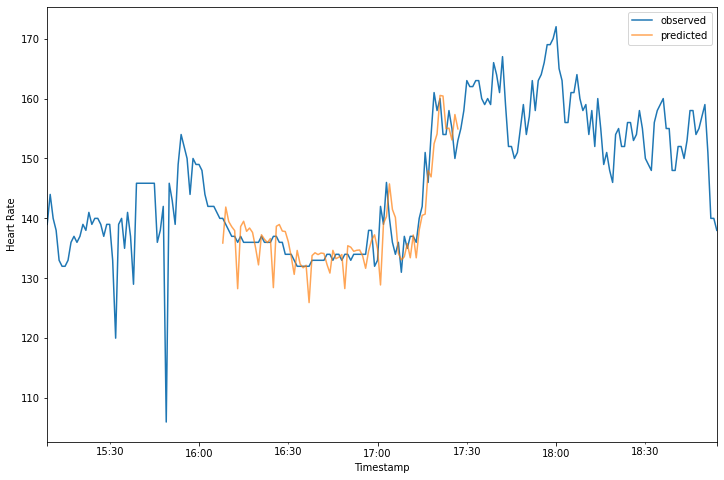

In [ ]:
# plot observations and predictions
ax = new_data['2015-08-17 15:09:00':]['Heart Rate'].plot(label='observed', figsize=(12, 8))
preds.plot(ax=ax, label='predicted', alpha=.7)

ax.set_xlabel('Timestamp')
ax.set_ylabel('Heart Rate')
plt.legend()

plt.show()

In [ ]:
#out-of- sample forcastes
forecasts = model_fit.forecast(steps=20)
print(forecasts)

2015-08-17 18:55:00    137.488528
2015-08-17 18:56:00    137.368539
2015-08-17 18:57:00    139.192958
2015-08-17 18:58:00    138.561379
2015-08-17 18:59:00    137.752635
2015-08-17 19:00:00    139.097223
2015-08-17 19:01:00    136.870632
2015-08-17 19:02:00    137.849670
2015-08-17 19:03:00    137.282643
2015-08-17 19:04:00    136.613949
2015-08-17 19:05:00    136.910652
2015-08-17 19:06:00    137.549929
2015-08-17 19:07:00    137.007737
2015-08-17 19:08:00    136.234227
2015-08-17 19:09:00    138.580025
2015-08-17 19:10:00    137.841272
2015-08-17 19:11:00    136.878259
2015-08-17 19:12:00    138.391468
2015-08-17 19:13:00    136.104203
2015-08-17 19:14:00    137.053510
Freq: T, Name: predicted_mean, dtype: float64


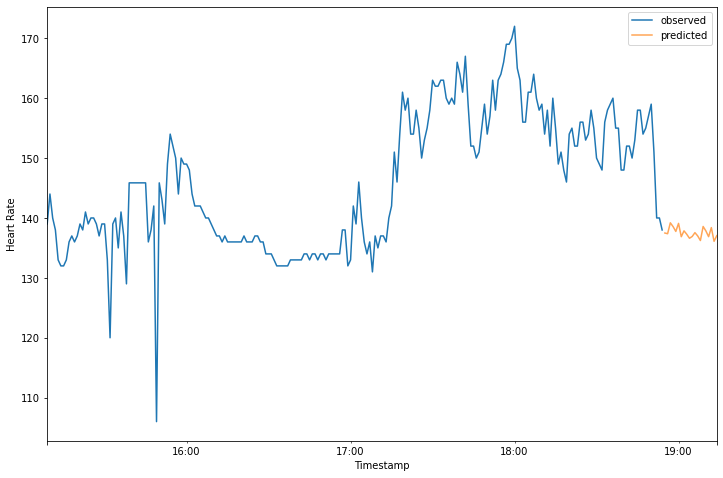

In [ ]:
# plot observations and predictions
ax = new_data['Heart Rate'].plot(label='observed', figsize=(12, 8))
forecasts.plot(ax=ax, label='predicted', alpha=.7)

ax.set_xlabel('Timestamp')
ax.set_ylabel('Heart Rate')
plt.legend()

plt.show()

# EXPONENTIAL SMOOTHING

In [ ]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('PT_Train.csv')

#Rename coloumn to better manage
df = df.rename(columns={"Timestamp (GMT)": "Timestamp"})
df = df.rename(columns={"Lifetouch Heart Rate": "Heart Rate"})

#Printing the head of 15 coloumns to review if coloumns have been adjusted
df.head(15)

# convert month to int
df['Minutes'] = list(range(0, len(df['Timestamp'])))

df.head()

,Timestamp,Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse,Minutes
0,17/08/2015 15:09,139,41,NaN,NaN,0
1,17/08/2015 15:10,144,40,92.0,140.0,1
2,17/08/2015 15:11,140,42,89.0,144.0,2
3,17/08/2015 15:12,138,45,93.0,141.0,3
4,17/08/2015 15:13,133,42,94.0,134.0,4


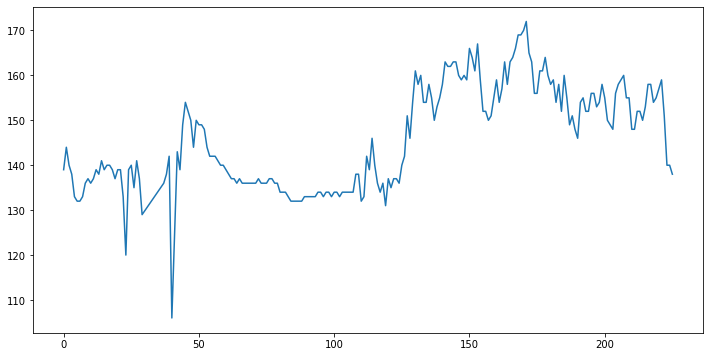

In [ ]:

# plot time series
plt.figure(figsize=(12, 6))
plt.plot(df["Minutes"],df["Heart Rate"])
plt.show()


In [ ]:
# single exponential smoothing
single_fit = SimpleExpSmoothing(df["Heart Rate"]).fit()

# double exponential smoothing
double_fit = Holt(df["Heart Rate"]).fit()

# triple exponential smoothing
tripple_fit = ExponentialSmoothing(df["Heart Rate"], trend="mul",seasonal="mul", seasonal_periods=12).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


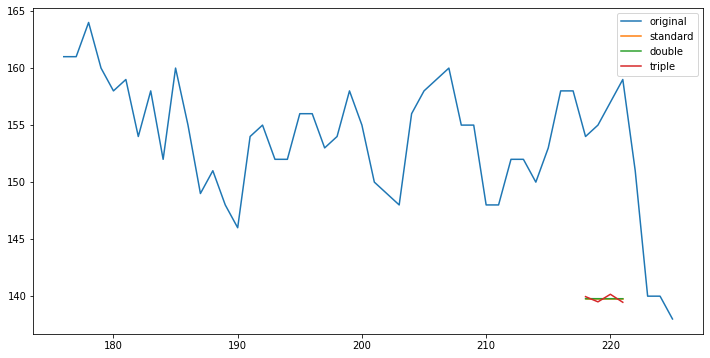

In [ ]:

# future predictions
predictions_single_fit = single_fit.forecast(4)
predictions_double_fit = double_fit.forecast(4)
predictions_tripple_fit = tripple_fit.forecast(4)

# plot data
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(df["Minutes"][-50:], df["Heart Rate"][-50:], label='original')

plt.plot(predictions_single_fit, label='standard')
plt.plot(predictions_double_fit, label='double')
plt.plot(predictions_tripple_fit, label='triple')

plt.legend()
plt.show()
     

In [ ]:
import json

predictions = [137.488528, 137.368539, 139.192958, 138.561379, 137.752635, 139.097223, 136.870632, 137.849670, 137.282643, 136.613949, 136.910652, 137.549929, 137.007737, 136.234227, 138.580025, 137.841272, 136.878259, 138.391468,  136.104203, 137.053510]
data = []
for pred in predictions:
    data.append({'prediction': pred})

print(data[0:20])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'prediction': 137.488528}, {'prediction': 137.368539}, {'prediction': 139.192958}, {'prediction': 138.561379}, {'prediction': 137.752635}, {'prediction': 139.097223}, {'prediction': 136.870632}, {'prediction': 137.84967}, {'prediction': 137.282643}, {'prediction': 136.613949}, {'prediction': 136.910652}, {'prediction': 137.549929}, {'prediction': 137.007737}, {'prediction': 136.234227}, {'prediction': 138.580025}, {'prediction': 137.841272}, {'prediction': 136.878259}, {'prediction': 138.391468}, {'prediction': 136.104203}, {'prediction': 137.05351}]
